<h1> Asan-Dopollos </h1>

In [218]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor, GradientBoostingClassifier
from sklearn import metrics





network = pd.read_csv('network.csv')
inspections = pd.read_csv('inspections.csv')
pipes = pd.read_csv('sample_submission.csv')
pipes = pipes.drop(['Incidence'],axis=1)
network.head()


KeyError: 'MaintenanceId'

In [205]:
inspections.head()

,PipeId,MaintenanceId,InspectionYear,InspectionDate,MonthsLastRev,Severity,Incidence
0,189311802,ZRV-00001972,2010,2010-10-01,24,4,0
1,188889914,ZRV-00001406,2010,2010-10-01,22,4,0
2,188889907,ZRV-00001406,2010,2010-10-01,22,4,0
3,188673355,ZRV-00001406,2010,2010-10-01,22,4,0
4,188558922,ZRV-00001406,2010,2010-10-01,22,4,0


Merge both dataframes by pipeId field

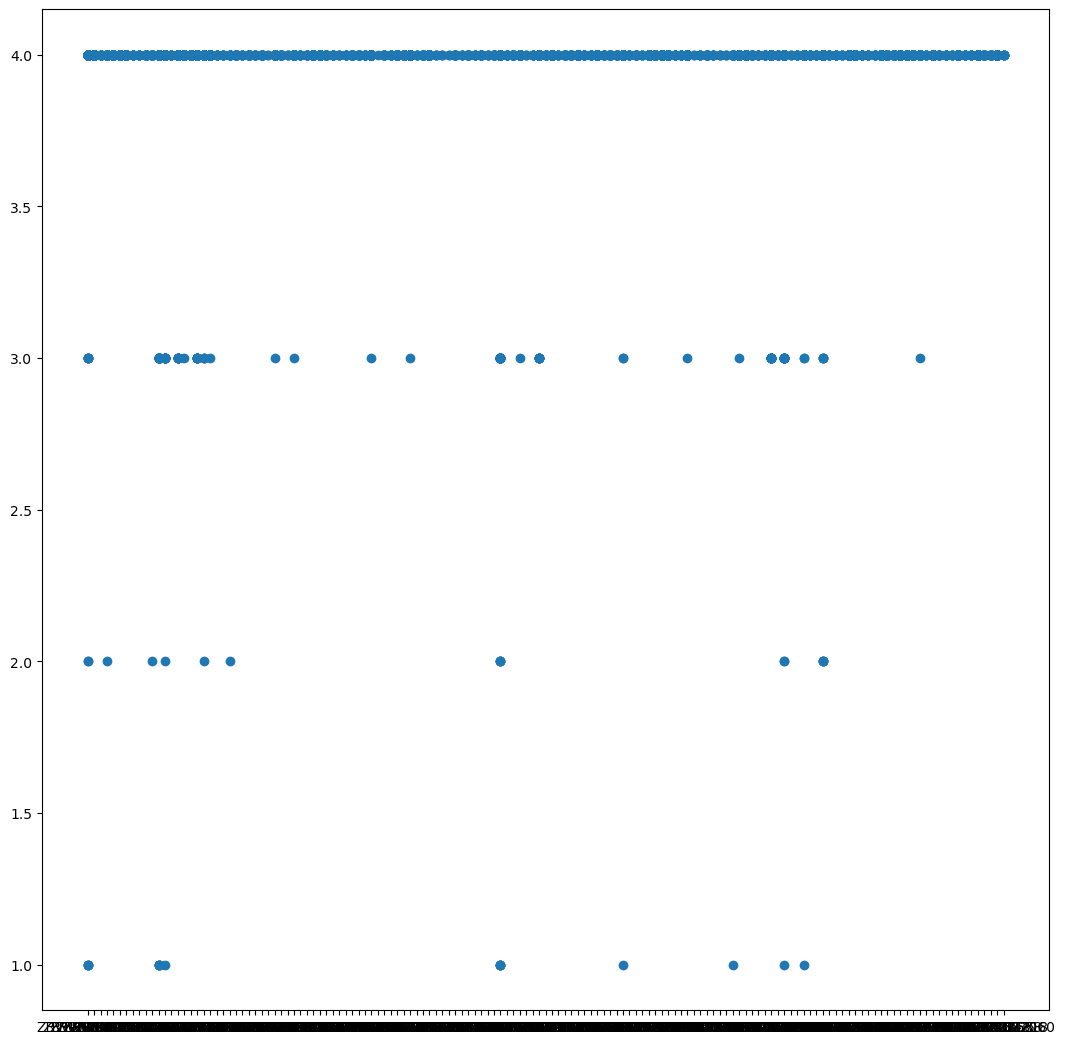

In [237]:
df = inspections.merge(
                        network,
                        how = 'inner',
                        on=['PipeId'] 
                        )

df = df.merge(
                pipes,
                how='inner',
                on=['PipeId']
)

maintenances = df.MaintenanceId.tolist()
severities = df.Severity.tolist()
plt.figure(figsize=(13, 13))
plt.scatter(maintenances[0:100000],severities[0:100000])

We will change the inspection date to datetime format

In [207]:
df['InspectionDate'] = pd.to_datetime(df['InspectionDate'])

Code to compute the correlation of the variables

Text(0.5, 1.0, 'Variable correllation with Power consumption')

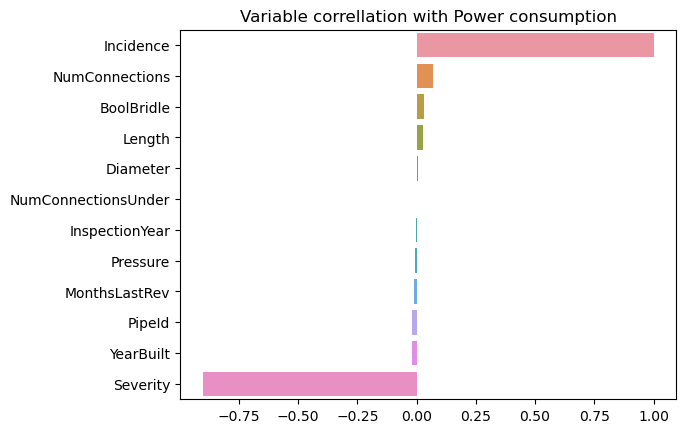

In [208]:
# Correlation of new columns
correlations = df.corr()['Incidence'].sort_values(ascending=False)
meaningful_vars = []
corr = []
for i in range(len(correlations.index)):
    meaningful_vars.append(correlations.index[i])
    corr.append(correlations[i])
sns.barplot(x=corr, y=meaningful_vars)
plt.title('Variable correllation with Power consumption')

We are going to drop the Province and Town columns since this is the first aproximation and its 4000 to hot encode. The numconnectionsunder and inspectionyear will also be deleted since they have to correlation. One hot encoding of the rest

In [209]:
df = df.drop(['Province','Town','NumConnectionsUnder','InspectionYear','MaintenanceId'],axis=1)

We will change the severity from 1-4 into categorical values instead of numbers

In [210]:
inverse_sev = {4:0,3:1,2:2,1:3}
list = []
for sev in df["Severity"]:
    list.append(inverse_sev[sev]) 

df['Severity'] = list
df

,PipeId,InspectionDate,MonthsLastRev,Severity,Incidence,YearBuilt,Material,GasType,Diameter,Length,Pressure,NumConnections,BoolBridle
0,188889914,2010-10-01,22,0,0,1999,PE,Gas natural,160.0,1.292,0.025,0,False
1,188889914,2011-11-17,13,0,0,1999,PE,Gas natural,160.0,1.292,0.025,0,False
2,188889914,2013-11-12,24,0,0,1999,PE,Gas natural,160.0,1.292,0.025,0,False
3,188889914,2015-11-06,24,0,0,1999,PE,Gas natural,160.0,1.292,0.025,0,False
4,188889914,2017-11-25,24,0,0,1999,PE,Gas natural,160.0,1.292,0.025,0,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3976942,185104861,2020-12-22,10,0,0,2009,PE,Gas natural,90.0,2.179,5.000,0,False
3976943,185103276,2020-12-22,10,0,0,2001,PE,Gas natural,90.0,30.302,4.000,1,False
3976944,185100526,2020-12-22,10,0,0,2018,PE,Gas natural,90.0,35.510,4.000,1,False
3976945,185073164,2020-12-22,10,0,0,2009,PE,Gas natural,90.0,11.434,5.000,0,False


Add year

In [211]:
df['Year'] = df['InspectionDate'].dt.year
df = pd.get_dummies(df)

In [212]:
for column in ['Diameter', 'Length', 'Pressure', 'YearBuilt','NumConnections']:
   df[column] = (df[column] - df[column].mean()) / df[column].std()


df =df.set_index('InspectionDate')
df.head()

,PipeId,MonthsLastRev,Severity,Incidence,YearBuilt,Diameter,Length,Pressure,NumConnections,BoolBridle,...,Material_AO,Material_CU,Material_FD,Material_FG,Material_FI,Material_PE,Material_PN,Material_ZD,GasType_Gas natural,GasType_Gas propano
InspectionDate,,,,,,,,,,,,,,,,,,,,,
2010-10-01,188889914,22,0,0,-0.153499,0.694585,-0.506271,-0.457961,-0.46934,False,...,0,0,0,0,0,1,0,0,1,0
2011-11-17,188889914,13,0,0,-0.153499,0.694585,-0.506271,-0.457961,-0.46934,False,...,0,0,0,0,0,1,0,0,1,0
2013-11-12,188889914,24,0,0,-0.153499,0.694585,-0.506271,-0.457961,-0.46934,False,...,0,0,0,0,0,1,0,0,1,0
2015-11-06,188889914,24,0,0,-0.153499,0.694585,-0.506271,-0.457961,-0.46934,False,...,0,0,0,0,0,1,0,0,1,0
2017-11-25,188889914,24,0,0,-0.153499,0.694585,-0.506271,-0.457961,-0.46934,False,...,0,0,0,0,0,1,0,0,1,0


<h2>Training and test to predict severity</h2>

In [216]:
# Separate data from target
y = df['Incidence']
X = df.copy()
X = X.drop(['Incidence','Severity'], axis=1)



X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=0)


forecaster = GradientBoostingClassifier()
forecaster.fit(X_train,y_train)
prediction = forecaster.predict(X_test)
print(metrics.roc_auc_score(y_test,prediction))

0.5045709028668867


In [217]:
print(metrics.confusion_matrix(y_test,prediction))

[[1309851      33]
 [   2486      23]]
